### Tutorial
A simple tutorial for using the gravity simulator API. This file also serves as documentation.

### Import libraries
First, we import some libraries. If the path is wrong, please correct it manually.

In [1]:
import os
import sys
from pathlib import Path

parent_path = str(Path.cwd().parent)
sys.path.append(parent_path)
print(f'Appended path: "{parent_path}"')

import numpy as np

from gravity_sim import GravitySimulatorAPI

grav_sim = GravitySimulatorAPI()

print()
print(grav_sim.BUILT_IN_SYSTEMS)
print(grav_sim.AVAILABLE_INTEGRATORS)
print(grav_sim.AVAILABLE_ACCELERATION_METHODS)
print(grav_sim.AVAILABLE_STORING_METHODS)

Appended path: "/Users/alvinng/Desktop/cuhk/gravity-simulator/Final Project/gravity-simulator"

dict_keys(['circular_binary_orbit', 'eccentric_binary_orbit', '3d_helix', 'sun_earth_moon', 'figure-8', 'pyth-3-body', 'solar_system', 'solar_system_plus'])
['euler', 'euler_cromer', 'rk4', 'leapfrog', 'rkf45', 'dopri', 'dverk', 'rkf78', 'ias15', 'whfast']
['pairwise', 'massless', 'barnes_hut']
['default', 'flush', 'disabled']


### Load pre-defined system

In [2]:
system = grav_sim.create_system()
system.load("solar_system")

### Adding new objects
Note that the default units are solar masses, AU and days

In [3]:
x = np.array([-8.092549658731499e-02, 2.558381434460076e00, -6.695836142398572e-02])
v = np.array(
    [
        -1.017876585480054e-02,
        -5.452367109338154e-04,
        1.255870551153315e-03,
    ]
)
m = 1.30268459e-10
system.add(x, v, m)

system.add_keplerian(
    semi_major_axis=4.2,
    eccentricity=0.1,
    inclination=0.1,
    longitude_of_ascending_node=1.0,
    argument_of_periapsis=1.0,
    true_anomaly=1.0,
    m=1.5e-9,
    primary_object_index=0,
)

system.center_of_mass_correction()

### Save system

In [4]:
system.save(Path(os.getcwd()) / "customized_systems.csv")

# You can also load customized system from csv files
# system.load("solar_system", Path(os.getcwd()) / "customized_systems.csv")

System "solar_system" successfully saved to "/Users/alvinng/Desktop/cuhk/gravity-simulator/Final Project/gravity-simulator/examples/customized_systems.csv"


### Plotting initial conditions

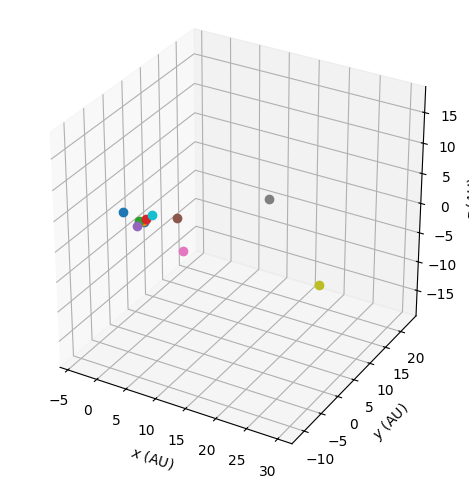

In [5]:
system.plot_3d_system()

### Launching simulation

In [6]:
sol_state, sol_time, sol_dt = grav_sim.launch_simulation(
    tf=grav_sim.years_to_days(1000.0),
    gravitational_system=system,
    integrator="leapfrog",
    dt=grav_sim.years_to_days(0.001),
    storing_freq=500,
)

Output()

---------- Simulation input ----------
integrator_params:
    integrator: leapfrog
    dt: 0.365242189
acceleration_params:
    method: pairwise
    softening_length: 0.0
storing_params:
    storing_freq: 500
    method: default
settings:
    disable_progress_bar: False
    make_copy_params: True
    make_copy_system: True
    verbose: 2
tf: 365242.189 days
--------------------------------------
Simulation in progress...


Simulation completed! Run time: 0.887 s



In [7]:
print(f"Data size = {len(sol_state)}")

Data size = 2001


### Plotting trajectories

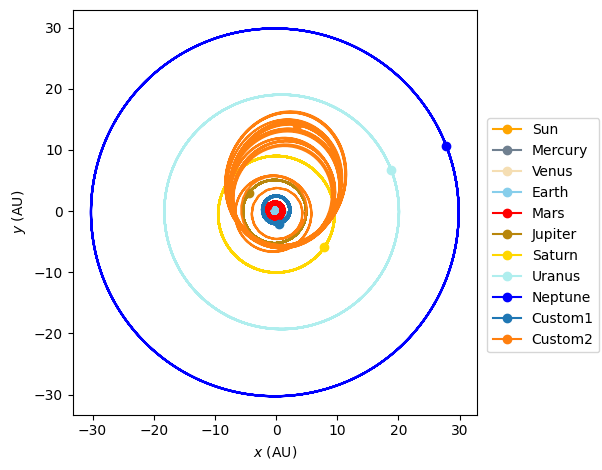

In [8]:
grav_sim.plot_2d_trajectory(
    sol_state,
    colors=[
        "orange",
        "slategrey",
        "wheat",
        "skyblue",
        "red",
        "darkgoldenrod",
        "gold",
        "paleturquoise",
        "blue",
        None,
        None,
    ],
    labels=[
        "Sun",
        "Mercury",
        "Venus",
        "Earth",
        "Mars",
        "Jupiter",
        "Saturn",
        "Uranus",
        "Neptune",
        "Custom1",
        "Custom2",
    ],
    legend=True,
)

### More plots

Output()

Computing energy...


Run time: 0.109 s



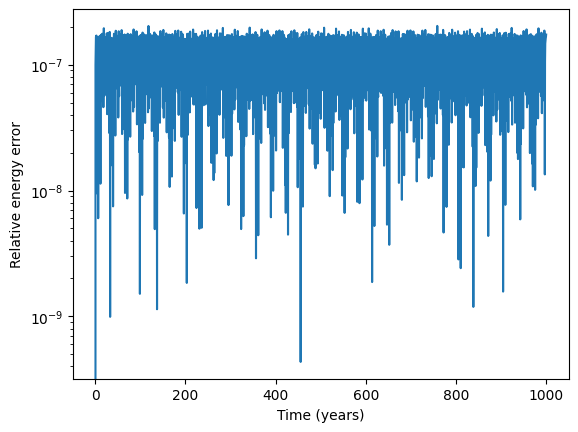

In [9]:
sol_energy = grav_sim.compute_energy(system, sol_state)
rel_energy_error = np.abs((sol_energy - sol_energy[0]) / sol_energy[0])
grav_sim.plot_quantity_against_time(
    quantity=rel_energy_error,
    is_log_y=True,
    sol_time=grav_sim.days_to_years(sol_time),
    xlabel="Time (years)",
    ylabel="Relative energy error",
)

Output()

Computing angular momentum...


Run time: 0.111 s



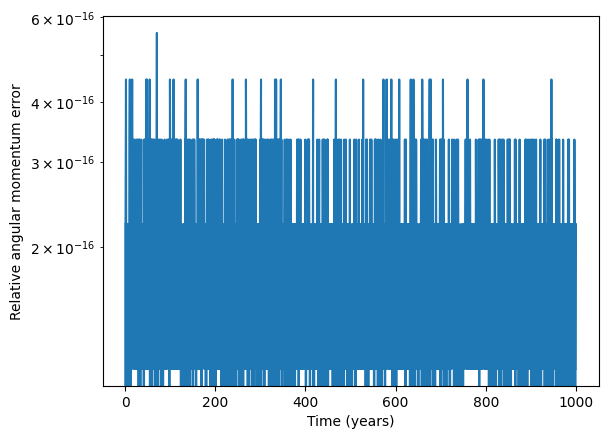

In [10]:
sol_angular_momentum = grav_sim.compute_angular_momentum(system, sol_state)
rel_angular_momentum_error = np.abs(
    (sol_angular_momentum - sol_angular_momentum[0]) / sol_angular_momentum[0]
)
grav_sim.plot_quantity_against_time(
    quantity=rel_angular_momentum_error,
    is_log_y=True,
    sol_time=grav_sim.days_to_years(sol_time),
    xlabel="Time (years)",
    ylabel="Relative angular momentum error",
)

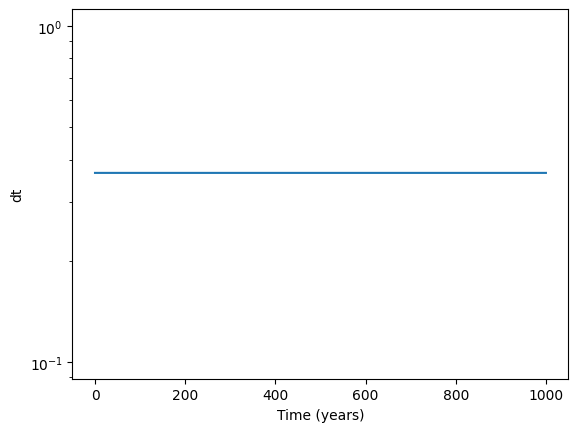

In [11]:
grav_sim.plot_quantity_against_time(
    quantity=sol_dt,
    is_log_y=True,
    sol_time=grav_sim.days_to_years(sol_time),
    xlabel="Time (years)",
    ylabel="dt",
)

### Animations

In [12]:
grav_sim.animate_3d_traj_gif(
    file_path=Path(os.getcwd()) / "animations/tutorial.gif",
    sol_state=sol_state,
    fps=30,
    dpi=150,
    plotting_freq=5,
    colors=[
        "orange",
        "slategrey",
        "wheat",
        "skyblue",
        "red",
        "darkgoldenrod",
        "gold",
        "paleturquoise",
        "blue",
        None,
        None,
    ],
    labels=[
        "Sun",
        "Mercury",
        "Venus",
        "Earth",
        "Mars",
        "Jupiter",
        "Saturn",
        "Uranus",
        "Neptune",
        "Custom1",
        "Custom2",
    ],
    legend=True,
    traj_len=50,
)

Output()

Combining frames to gif...


### Save and reading results

In [13]:
grav_sim.save_results(
    file_path=Path(os.getcwd()) / "tutorial_results.csv",
    sol_state=sol_state,
    sol_time=sol_time,
    sol_dt=sol_dt,
    sol_energy=sol_energy,
)

sol_state, sol_time, sol_dt, sol_energy = grav_sim.read_results(
    file_path=Path(os.getcwd()) / "tutorial_results.csv"
)

Output()

Saving results to CSV file...


Run time: 0.15 s
Done! Results saved to "/Users/alvinng/Desktop/cuhk/gravity-simulator/Final Project/gravity-simulator/examples/tutorial_results.csv".


### Splitting simulations into multiple sessions (Not available for WHFast)
After a simulation session, you can simply call `grav_sim.resume_simulation(simulation_time)` to launch a new session with the last saved state.
All the simulation parameters remains the same.
However, note that all the previous simulation history will be gone, so save them first before you resume the simulation.

*For WHFast, using `resume_simulation` would introduce error due to unknown bugs and is thus not recommended.

Output()

Simulation in progress...


Simulation completed! Run time: 0.498 s



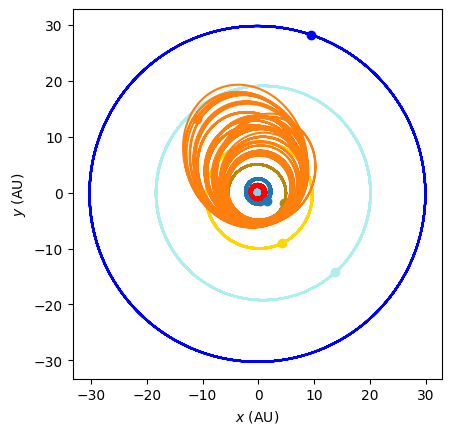

In [14]:
sol_state, sol_time, sol_dt = grav_sim.resume_simulation(tf=grav_sim.years_to_days(2000.0))

grav_sim.plot_2d_trajectory(
    sol_state,
    colors=[
        "orange",
        "slategrey",
        "wheat",
        "skyblue",
        "red",
        "darkgoldenrod",
        "gold",
        "paleturquoise",
        "blue",
        None,
        None,
    ],
)

### Adaptive step size integrators

When using adaptive step size integrators, we provide tolerance rather than $\text{d}t$ to control the step size.
| Adaptive step size integrators | Recommended tolerance* |
|:-----------|:-------------|
| Runge–Kutta–Fehlberg 4(5) | $10^{-8}$ to $10^{-14}$ |
| Dormand–Prince method (DOPRI) 5(4) | $10^{-8}$ to $10^{-14}$ |
| Verner's method (DVERK) 6(5) | $10^{-8}$ to $10^{-14}$ |
| Runge–Kutta–Fehlberg 7(8) | $10^{-4}$ to $10^{-8}$ |
| IAS15 | $10^{-9}$ |

*For reference only

Using pyth-3-body, a highly chaotic system, we can easily see the difference between adaptive step size integrators and fixed step size integrators.

For RK4, the largest $\text{d}t$ we can use for this system is 2e-8.

Output()

IAS15:
---------- Simulation input ----------
integrator_params:
    integrator: ias15
    tolerance: 1e-09
acceleration_params:
    method: pairwise
    softening_length: 0.0
storing_params:
    method: default
    storing_freq: 1
settings:
    disable_progress_bar: False
    make_copy_params: True
    make_copy_system: True
    verbose: 2
tf: 70.0 days
--------------------------------------
Simulation in progress...


Simulation completed! Run time: 0.227 s



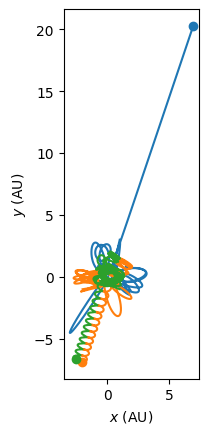

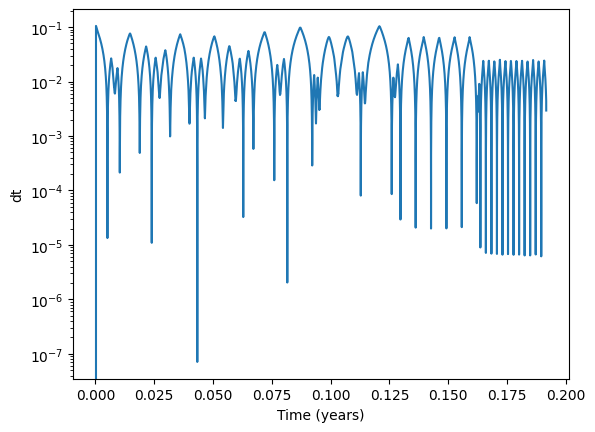

Output()

RK4:
---------- Simulation input ----------
integrator_params:
    integrator: rk4
    dt: 1e-05
acceleration_params:
    method: pairwise
    softening_length: 0.0
storing_params:
    method: default
    storing_freq: 1
settings:
    disable_progress_bar: False
    make_copy_params: True
    make_copy_system: True
    verbose: 2
tf: 70.0 days
--------------------------------------
Simulation in progress...


/Users/alvinng/Desktop/cuhk/gravity-simulator/Final Project/gravity-simulator/gravity_sim/api.py:254: UserWarning: Unknown key: store_every_n
  warnings.warn(f"Unknown key: {key}")


Simulation completed! Run time: 1.160 s



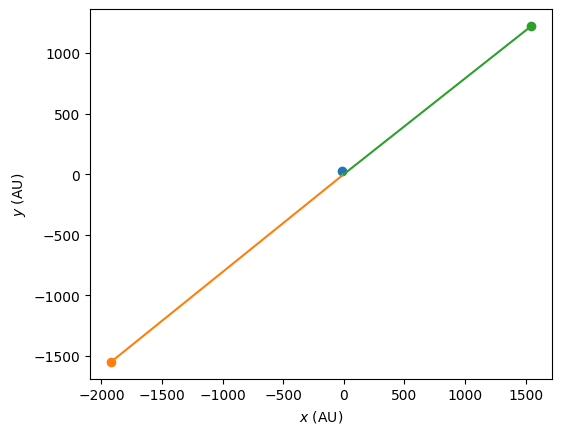

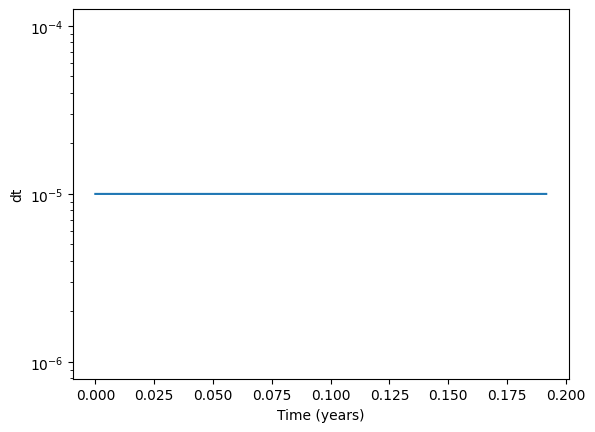

In [15]:
IAS15_system = grav_sim.create_system()
IAS15_system.load("pyth-3-body")

print("IAS15:")
sol_state, sol_time, sol_dt = grav_sim.launch_simulation(
    gravitational_system=IAS15_system,
    integrator="ias15",
    tf=70.0,
    tolerance=1e-9,
)

grav_sim.plot_2d_trajectory(sol_state)
grav_sim.plot_quantity_against_time(
    quantity=sol_dt,
    is_log_y=True,
    sol_time=grav_sim.days_to_years(sol_time),
    xlabel="Time (years)",
    ylabel="dt",
)

print("RK4:")
sol_state, sol_time, sol_dt = grav_sim.launch_simulation(
    gravitational_system=IAS15_system,
    integrator="rk4",
    tf=70.0,
    dt=1e-5,
    store_every_n=10000,
)

grav_sim.plot_2d_trajectory(sol_state)
grav_sim.plot_quantity_against_time(
    quantity=sol_dt,
    is_log_y=True,
    sol_time=grav_sim.days_to_years(sol_time),
    xlabel="Time (years)",
    ylabel="dt",
)

### WHFast

When using WHFast, the order of adding objects matters. Since WHFast use Jacobi coordinate, we must first add the inner object. 

For convenience, you may also add the objects in any order, and then call `system.sort_by_distance(primary_object_index)`

In [16]:
WHFast_system = grav_sim.create_system()
WHFast_system.load("solar_system")

# Shuffle the system for demonstration, except the Sun
indices = np.arange(WHFast_system.objects_count - 1, dtype=int)
np.random.shuffle(indices)
indices += 1
indices = np.hstack(([0], indices))

WHFast_system.x = WHFast_system.x[indices]
WHFast_system.v = WHFast_system.v[indices]
WHFast_system.m = WHFast_system.m[indices]

WHFast_system.sort_by_distance(primary_object_index=0)

Simulating the solar system with WHFast

Output()

---------- Simulation input ----------
integrator_params:
    integrator: whfast
    dt: 1.095726567
acceleration_params:
    method: pairwise
    softening_length: 0.0
storing_params:
    method: default
    storing_freq: 1
settings:
    disable_progress_bar: False
    make_copy_params: True
    make_copy_system: True
    verbose: 2
tf: 365242.189 days
--------------------------------------
Simulation in progress...


Simulation completed! Run time: 0.460 s



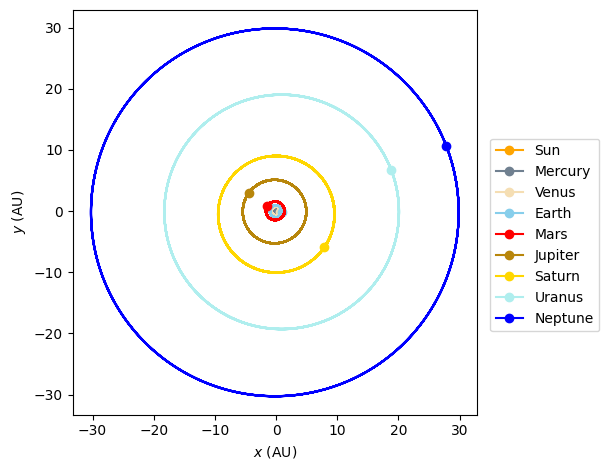

Output()

Computing energy...


Run time: 0.138 s



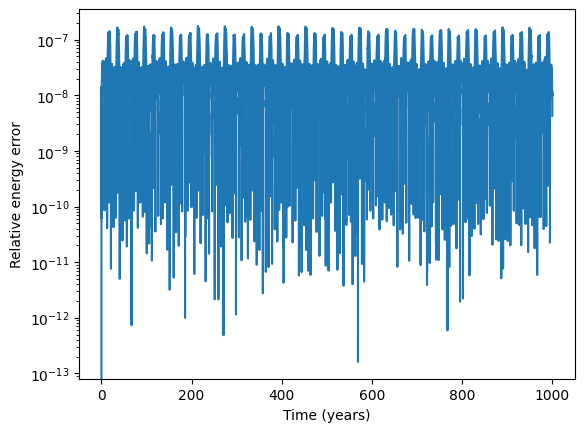

In [17]:
sol_state, sol_time, sol_dt = grav_sim.launch_simulation(
    gravitational_system=WHFast_system,
    integrator="whfast",
    tf=grav_sim.years_to_days(1000.0),
    dt=grav_sim.years_to_days(0.003),
    store_every_n=10,
)

colors = [
    "orange",
    "slategrey",
    "wheat",
    "skyblue",
    "red",
    "darkgoldenrod",
    "gold",
    "paleturquoise",
    "blue",
]
labels=[
        "Sun",
        "Mercury",
        "Venus",
        "Earth",
        "Mars",
        "Jupiter",
        "Saturn",
        "Uranus",
        "Neptune",
    ]
grav_sim.plot_2d_trajectory(
    sol_state,
    colors=colors,
    legend=True,
    labels=labels,
)
sol_energy = grav_sim.compute_energy(WHFast_system, sol_state)
rel_energy_error = np.abs((sol_energy - sol_energy[0]) / sol_energy[0])
grav_sim.plot_quantity_against_time(
    quantity=rel_energy_error,
    is_log_y=True,
    sol_time=grav_sim.days_to_years(sol_time),
    xlabel="Time (years)",
    ylabel="Relative energy error",
)

You may run the following code block to see what happens when we don't sort the order by distance. Usually, the system would become much more unstable and also have a larger energy error. Sometimes, the program may even get stuck.

---------- Simulation input ----------
integrator_params:
    integrator: whfast
    dt: 1.095726567
acceleration_params:
    method: pairwise
    softening_length: 0.0
storing_params:
    storing_freq: 10
    method: default
settings:
    disable_progress_bar: False
    make_copy_params: True
    make_copy_system: True
    verbose: 2
tf: 109572.65669999999 days
--------------------------------------
Simulation in progress...


Output()

Simulation completed! Run time: 0.221 s



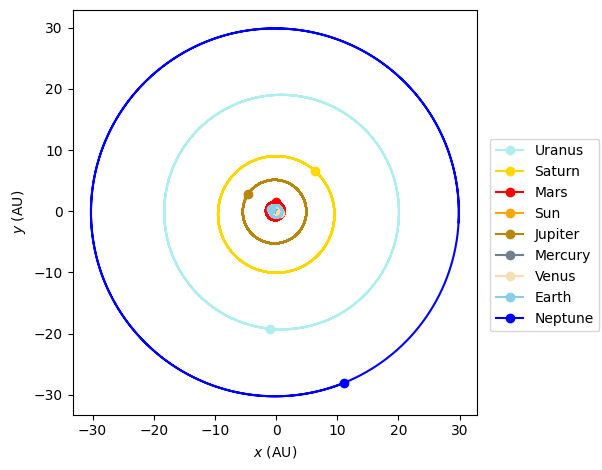

Output()

Computing energy...


Run time: 0.135 s



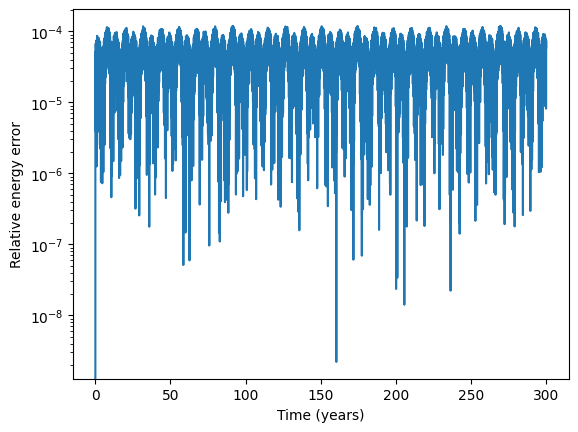

In [18]:
WHFast_system = grav_sim.create_system()
WHFast_system.load("solar_system")

# Shuffle the system for demonstration, including the Sun
indices = np.arange(WHFast_system.objects_count, dtype=int)
np.random.shuffle(indices)
WHFast_system.x = WHFast_system.x[indices]
WHFast_system.v = WHFast_system.v[indices]
WHFast_system.m = WHFast_system.m[indices]

sol_state, sol_time, sol_dt = grav_sim.launch_simulation(
    gravitational_system=WHFast_system,
    integrator="whfast",
    tf=grav_sim.years_to_days(300.0),
    dt=grav_sim.years_to_days(0.003),
    storing_freq=10,
)
colors = [
    "orange",
    "slategrey",
    "wheat",
    "skyblue",
    "red",
    "darkgoldenrod",
    "gold",
    "paleturquoise",
    "blue",
]
new_colors = [colors[i] for i in indices]
labels=[
        "Sun",
        "Mercury",
        "Venus",
        "Earth",
        "Mars",
        "Jupiter",
        "Saturn",
        "Uranus",
        "Neptune",
    ]
new_labels = [labels[i] for i in indices]
grav_sim.plot_2d_trajectory(
    sol_state,
    colors=new_colors,
    labels=new_labels,
    legend=True,
)
sol_energy = grav_sim.compute_energy(WHFast_system, sol_state)
rel_energy_error = np.abs((sol_energy - sol_energy[0]) / sol_energy[0])
grav_sim.plot_quantity_against_time(
    quantity=rel_energy_error,
    is_log_y=True,
    sol_time=grav_sim.days_to_years(sol_time),
    xlabel="Time (years)",
    ylabel="Relative energy error",
)

# END
Here is the end of the tutorial. Check out other projects in the `examples` folder for more advanced usage.
* `solar_system_one_mil_yrs.ipynb`
* `asteroid_belt_animation.py`
* `kirkwood_gap.py`